<a href="https://colab.research.google.com/github/akanksha0911/DeepLearning-DeepDive-Assignment1-/blob/main/Gradient_Descent_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By Akanksha Rawat**

Gradient Descent in Linear Regression

Linear Regression

y= mx+b or F = y- (mx+b)
In order to fit the regression line we need to tune two parameters : Slope(m) and intercept(b)
Once optimal parameters are found, we usually evaluate the results with Mean Squared Error , and we try to minimize it.


y = estimated dependent value.
b = constant or bias.
m = regression coefficient or slope.
x = value of the independent variable

In [136]:
#Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Kaggle_data/GD_LR/data_LinearRegression.csv')

In [137]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [138]:
#Preparing the data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

In [139]:
x

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [140]:
y

array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389,
       32.46387493, 10.78089683, 80.7633986 , 24.61215147,  6.96331907,
       11.23757338, 13.53290206, 24.60323899, 39.40049976, 48.43753838,
       61.69900319, 26.92832418, 70.4052055 , 29.34092408, 25.30895192,
       69.02934339, 84.99484703, 57.04310305, 50.5921991 , 83.02772202,
       57.05752706, 47.95883341, 24.34226432, 94.68488281, 48.03970696,
        7.08132338, 21.99239907, 42.33151664,  0.32908944, 61.92303698,
       91.17716423, 39.45358014,  5.99606961, 22.59015942, 61.18044414,
       85.02778957, -1.28631089, 61.94273962, 21.96033347, 33.66194193,
       17.60946242, 58.5630564 , 52.82390762, 22.1363481 , 35.07467353,
       86.18822311, 42.63227697,  4.09817744, 61.2229864 , 17.70677576,
       11.85312574, 80.23051695, 62.64931741,  9.6168598 , 20.02797699,
       61.7510743 , 71.61010303, 23.77154623, 51.90142035, 22.66073682,
       50.02897927, 26.68794368,  0.3769119 ,  6.806419  , 77.33

In [141]:
class LinearRegressionGD:
  def __init__(self, x, y):
    self.data = x
    self.label = y

    self.m = 0
    self.b = 0
    self.n = len(x)
    

  def fit(self, epochs, lr):
    #implementing Gradient Descent
    past_costs = []
    for i in range(epochs):
      y_pred = self.m * self.data + self.b

      #Calculating derivatives w.r.t Parameters
      D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
      D_b = (-1/self.n)*sum(self.label-y_pred)

      #Updating Parameters
      self.m = self.m - lr * D_m
      self.b = self.b - lr * D_b

  def predict(self , inp):
     past_costs = []  
     y_pred = self.m * inp + self.b 
     error = y_pred - self.label
     cost = 1/(2*self.m) * np.dot(error.T, error)
     past_costs.append(cost)
     return y_pred, past_costs

  


In [142]:
#Creating the class object
regressor = LinearRegressionGD(x,y)

In [143]:
#Training the model with .fit method
regressor.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001

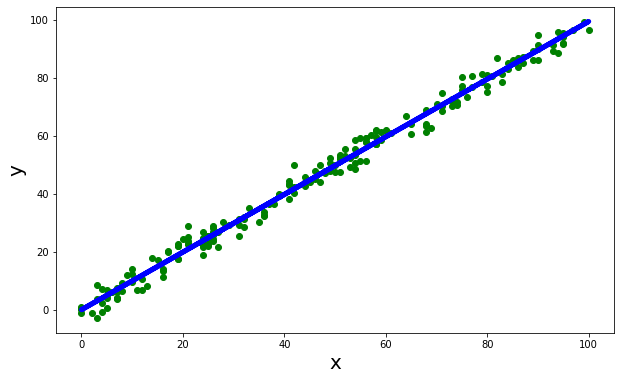

In [144]:
plt.figure(figsize = (10,6))
plt.scatter(x, y, color = 'green')
plt.plot(x , y_pred , color = 'blue' , lw = 5)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

**Stochastic Gradient Descent from Scratch**

Stochastic Gradient Descent

Here, instead of calculating the partial derivative for the whole training set, the calcuation is only done on one random sample(stochastic meaning random). This is great because the calcuations are only needed to be done on one training example instead of the whole training set, making it much faster and ideal for large datasets.

However,due to its inherent randomness, stochastic gradient descent does not have a smooth descend as in batch gradient descent. This means that it will bounce around, and while it may produce good parameters,they will rarely be optimal.

In [145]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = load_boston().data
Y = load_boston().target

In [ ]:
load_boston().feature_names

In [147]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [148]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)
X_train

In [135]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)

    return np.array(y_pred)
    
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 534.713
Epoch: 2, Loss: 516.760
Epoch: 3, Loss: 496.648
Epoch: 4, Loss: 491.024
Epoch: 5, Loss: 489.061
Epoch: 6, Loss: 541.610
Epoch: 7, Loss: 503.866
Epoch: 8, Loss: 530.143
Epoch: 9, Loss: 547.589
Epoch: 10, Loss: 554.521
Epoch: 11, Loss: 495.690
Epoch: 12, Loss: 546.012
Epoch: 13, Loss: 548.600
Epoch: 14, Loss: 530.231
Epoch: 15, Loss: 582.426
Epoch: 16, Loss: 555.807
Epoch: 17, Loss: 584.488
Epoch: 18, Loss: 507.449
Epoch: 19, Loss: 500.328
Epoch: 20, Loss: 517.411
Epoch: 21, Loss: 493.406
Epoch: 22, Loss: 544.272
Epoch: 23, Loss: 483.672
Epoch: 24, Loss: 544.895
Epoch: 25, Loss: 511.651
Epoch: 26, Loss: 534.528
Epoch: 27, Loss: 527.630
Epoch: 28, Loss: 534.295
Epoch: 29, Loss: 553.255
Epoch: 30, Loss: 577.553
Epoch: 31, Loss: 466.734
Epoch: 32, Loss: 506.989
Epoch: 33, Loss: 548.302
Epoch: 34, Loss: 539.941
Epoch: 35, Loss: 544.259
Epoch: 36, Loss: 566.408
Epoch: 37, Loss: 510.429
Epoch: 38, Loss: 561.792
Epoch: 39, Loss: 564.663
Epoch: 40, Loss: 536.228
Epoch: 41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


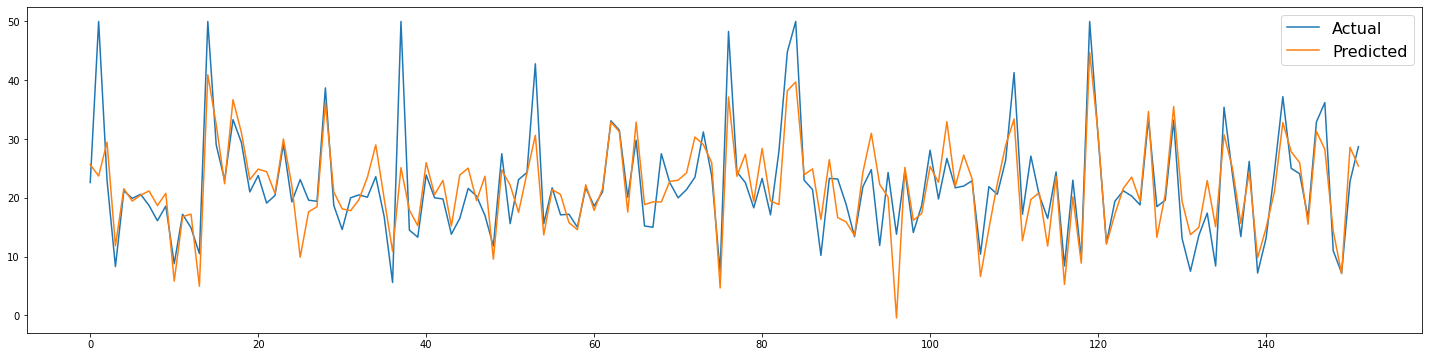

Mean Squared Error : 27.30586304509259


In [150]:
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))
